# Intra-Class

> Examining the distribution within classes

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
import random

import torch.nn.functional as F

from fastai.vision.all import *

from similarity_learning.all import *

from Few_Shot_Feature_Space.utils import *

In [ ]:
def sample_pair(features_by_class, c=None):
    c = random.choice(list(features_by_class.keys())) if c is None else c
    return [features_by_class[c].centroid, random.choice(features_by_class[c].ftrs)]

def intra_class_angles(features_by_class, n_samples=int(1e5)):
    dl = TfmdDL(range(n_samples),
                num_workers=0,
                after_item=lambda _: sample_pair(features_by_class),
                after_batch=lambda o: F.cosine_similarity(*o).arccos().rad2deg())
    return torch.cat(list(progress_bar(dl))).cpu()

def intra_class_hist(dls, fe, c=None):
    class_ftrs = ClassFeatures.compute(dls.train, fe, min_samples=30)
    angles = intra_class_angles(class_ftrs)
    plot_hist(angles)


In [ ]:
vggface2_fe = FaceNetInceptionResnetV1('vggface2', classify=False)
casia_webface_fe = FaceNetInceptionResnetV1('casia-webface', classify=False)

lfw_dls = dls = LFWPeople().dev().dls()
pfr_dls = PinterestFaces(splitter=lambda items: (range_of(items), [])).dls()

## VGGFace2

### LFW

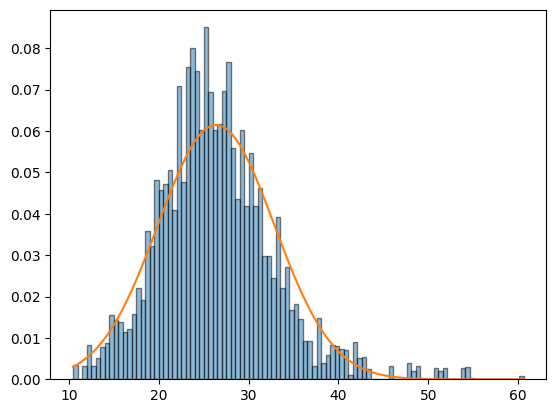

In [ ]:
intra_class_hist(lfw_dls, vggface2_fe)

### PFR

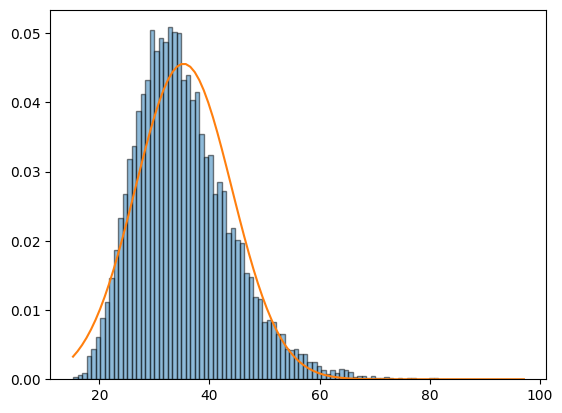

In [ ]:
intra_class_hist(pfr_dls, vggface2_fe)

## CASIA-WebFace

### LFW

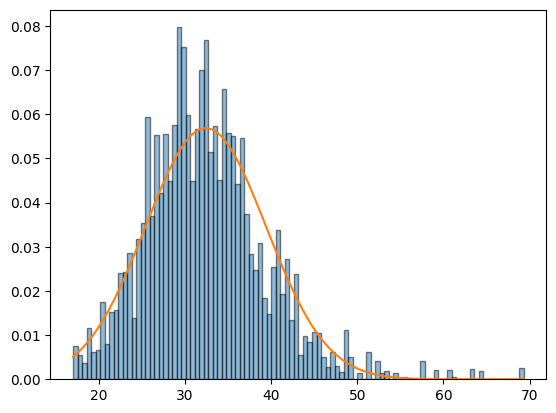

In [ ]:
intra_class_hist(lfw_dls, casia_webface_fe)

### PFR

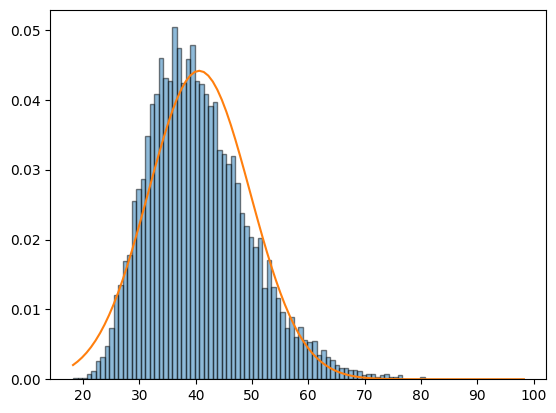

In [ ]:
intra_class_hist(pfr_dls, casia_webface_fe)